# Seaborn PLot

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1500)

In [3]:
print(sns.__version__)
#latest 1.13
#!pip install seaborn -U
#conda update --all

0.13.0


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
mtcars = data('mtcars')
iris = data('iris')
flights = sns.load_dataset('flights')
print(mtcars.shape, iris.shape, flights.shape)

(32, 11) (150, 5) (144, 3)


## line Plot
-  https://seaborn.pydata.org/generated/seaborn.lineplot.html

<Axes: xlabel='wt', ylabel='mpg'>

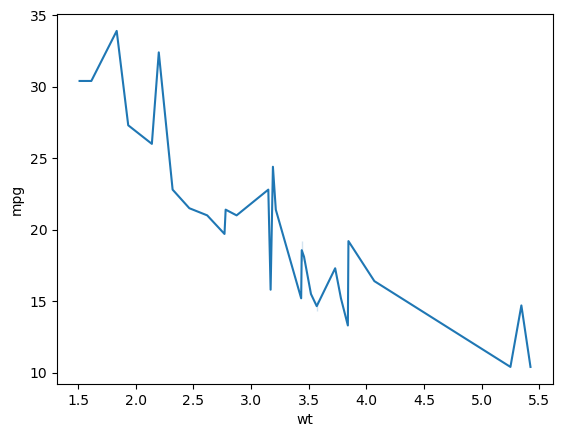

In [6]:
sns.lineplot(data=mtcars.sort_values(by='wt'), x="wt", y="mpg")

<Axes: xlabel='year', ylabel='passengers'>

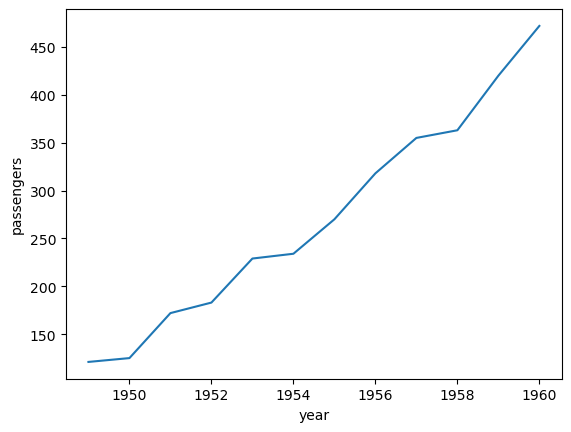

In [7]:
sns.lineplot(data=flights.query("month == 'May'"), x="year", y="passengers")

In [8]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,...,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,
1949,112,118,132,129,121,...,148,136,119,104,118
1950,115,126,141,135,125,...,170,158,133,114,140
1951,145,150,178,163,172,...,199,184,162,146,166
1952,171,180,193,181,183,...,242,209,191,172,194
1953,196,196,236,235,229,...,272,237,211,180,201


<Axes: xlabel='year', ylabel='May'>

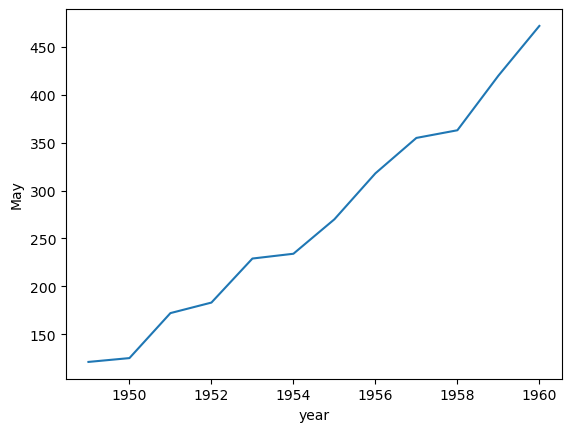

In [9]:
sns.lineplot(data=flights_wide["May"])

<Axes: xlabel='year'>

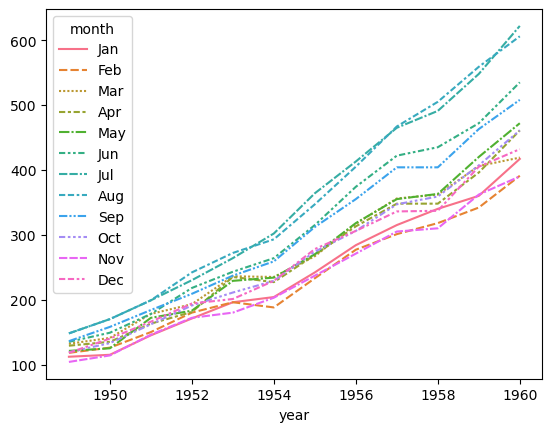

In [10]:
sns.lineplot(data=flights_wide)  #all months 
#which month and year, max flights

<Axes: xlabel='year', ylabel='passengers'>

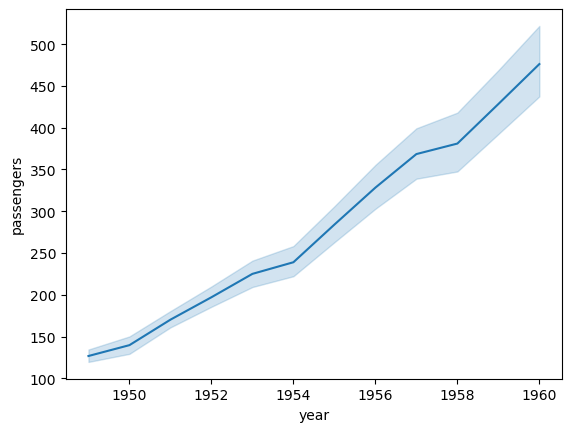

In [11]:
sns.lineplot(data=flights, x="year", y="passengers")
#Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:

<Axes: xlabel='year', ylabel='passengers'>

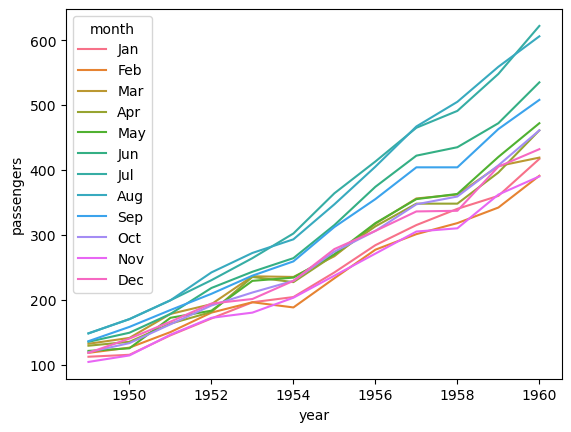

In [12]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")
#Assign a grouping semantic (hue, size, or style) to plot separate lines

<Axes: xlabel='year', ylabel='passengers'>

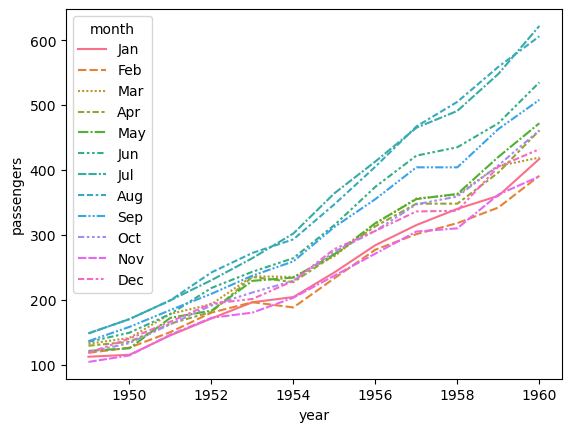

In [13]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month")

<Axes: xlabel='passengers', ylabel='year'>

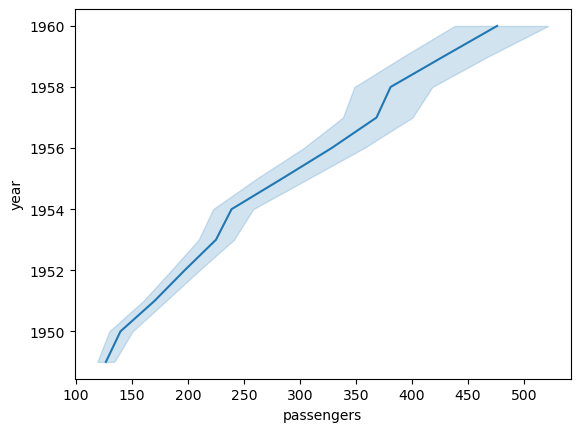

In [14]:
#Use the orient parameter to aggregate and sort along the vertical dimension of the plot:
sns.lineplot(data=flights, x="passengers", y="year", orient="y")

## Scatter Plot
-  https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

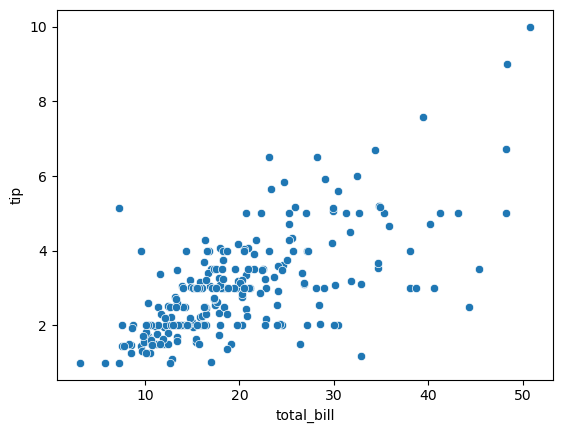

In [16]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='wt', ylabel='mpg'>

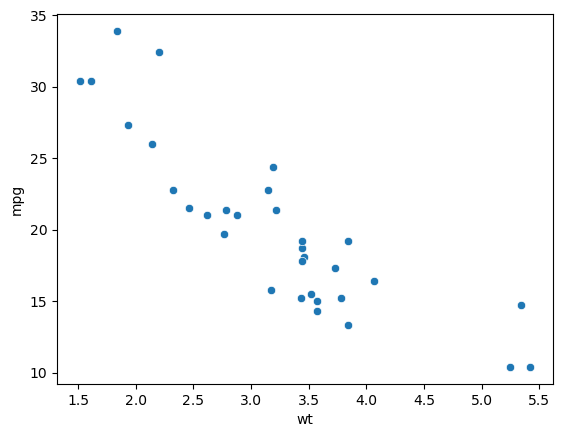

In [17]:
sns.scatterplot(data=mtcars, x='wt', y='mpg')

<Axes: xlabel='total_bill', ylabel='tip'>

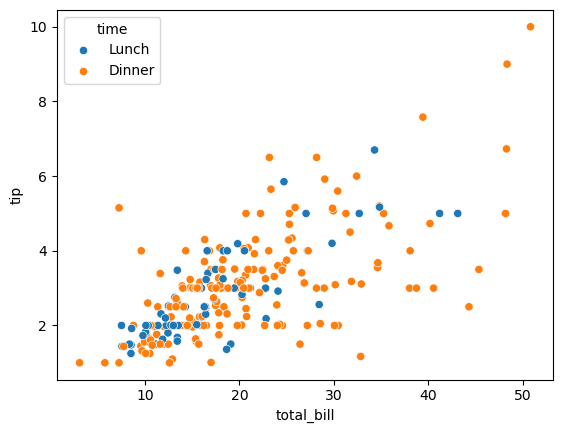

In [18]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

<Axes: xlabel='wt', ylabel='mpg'>

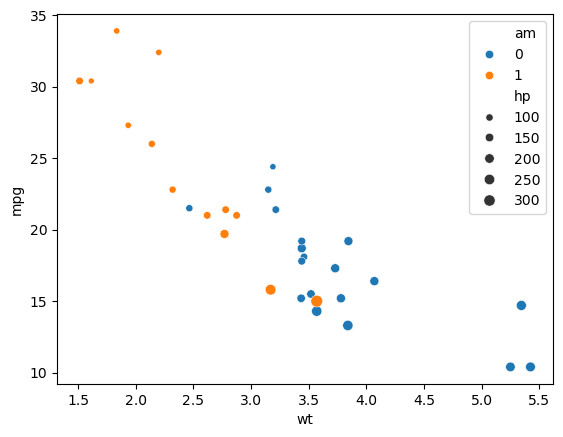

In [19]:
sns.scatterplot(data=mtcars, x='wt', y='mpg', hue='am', size='hp')

<Axes: xlabel='total_bill', ylabel='tip'>

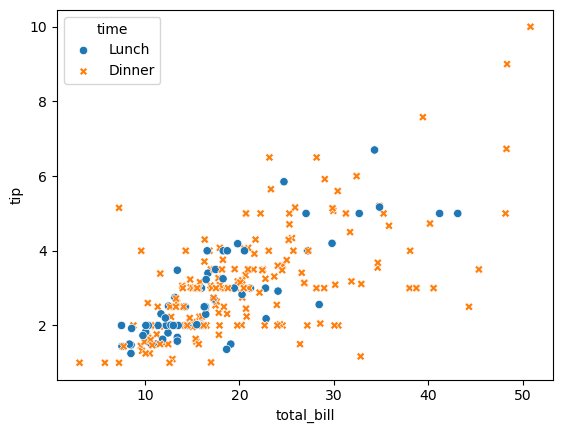

In [20]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")

<Axes: xlabel='total_bill', ylabel='tip'>

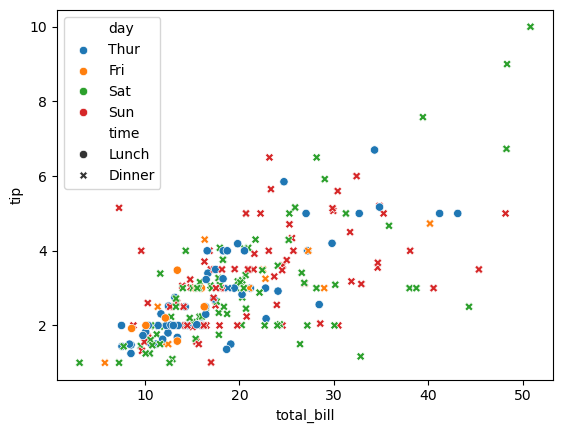

In [21]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

<Axes: xlabel='total_bill', ylabel='tip'>

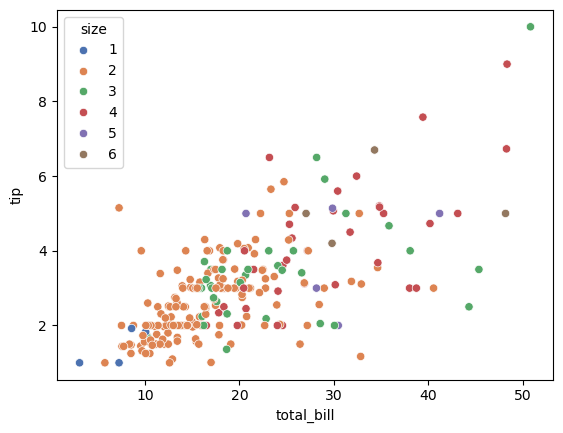

In [22]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette='deep')

<Axes: xlabel='total_bill', ylabel='tip'>

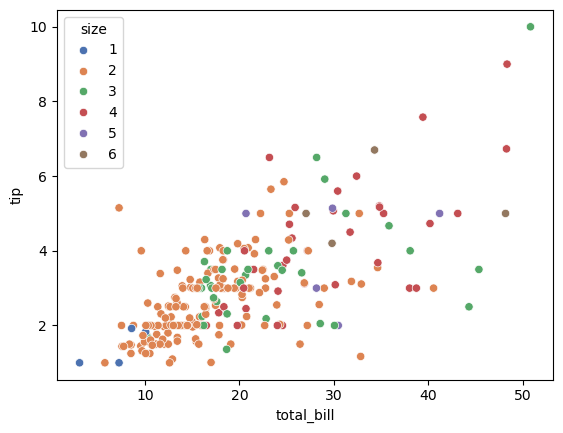

In [23]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

<Axes: xlabel='total_bill', ylabel='tip'>

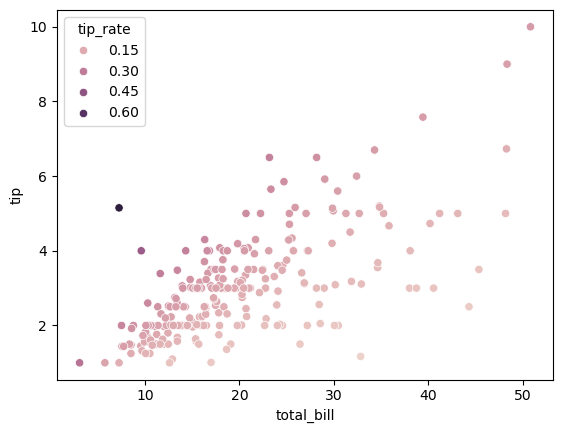

In [24]:
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)

<Axes: xlabel='total_bill', ylabel='tip'>

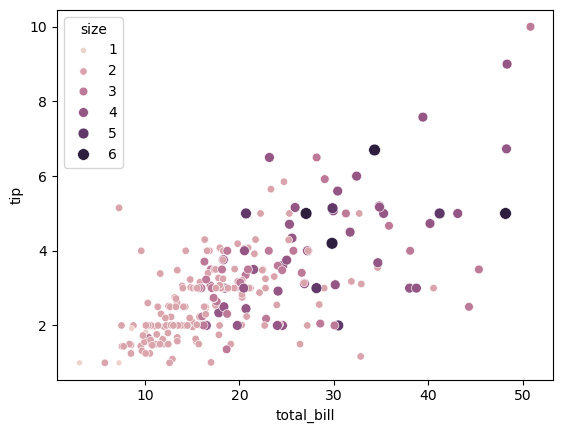

In [25]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size")

<Axes: xlabel='total_bill', ylabel='tip'>

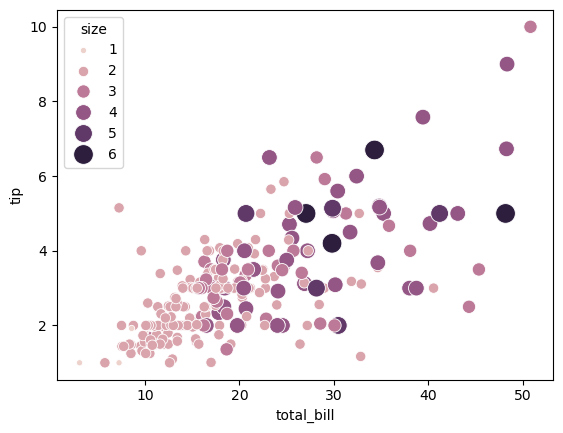

In [26]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

<Axes: xlabel='total_bill', ylabel='tip'>

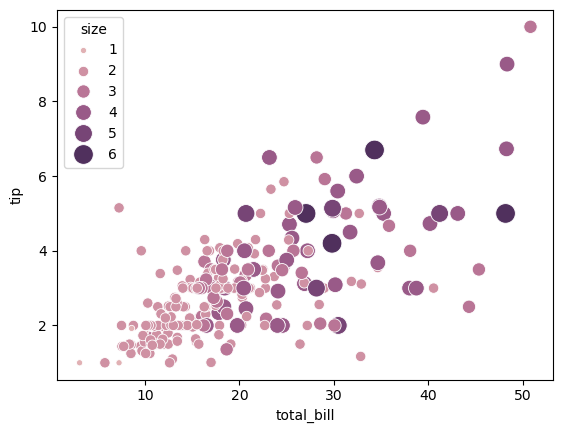

In [27]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

<Axes: xlabel='total_bill', ylabel='tip'>

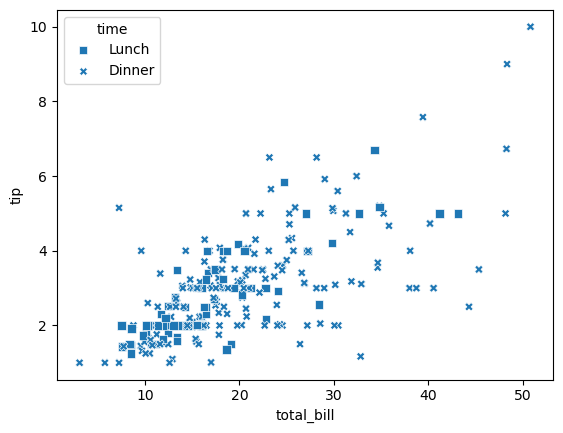

In [28]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)

<Axes: xlabel='total_bill', ylabel='tip'>

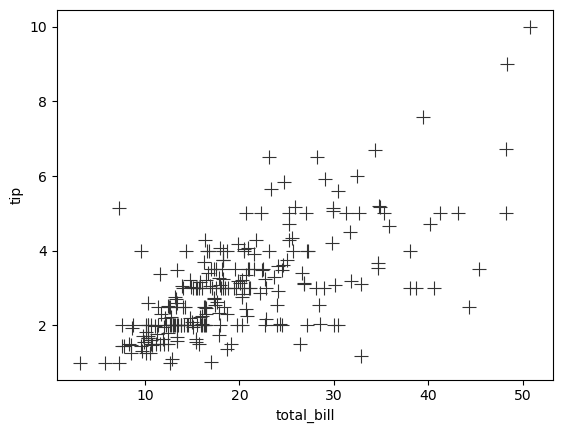

In [29]:
sns.scatterplot(data=tips, x="total_bill", y="tip", s=100, color=".2", marker="+")

<Axes: xlabel='date'>

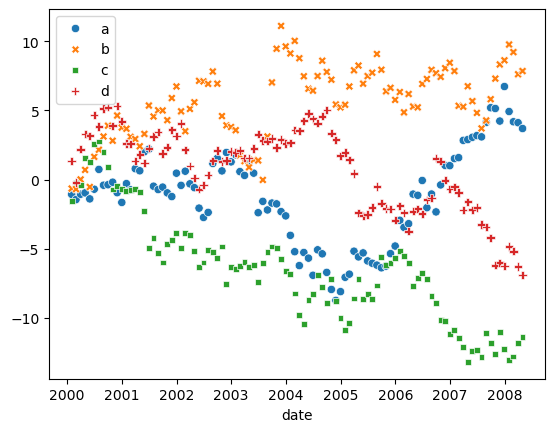

In [30]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=wide_df)

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


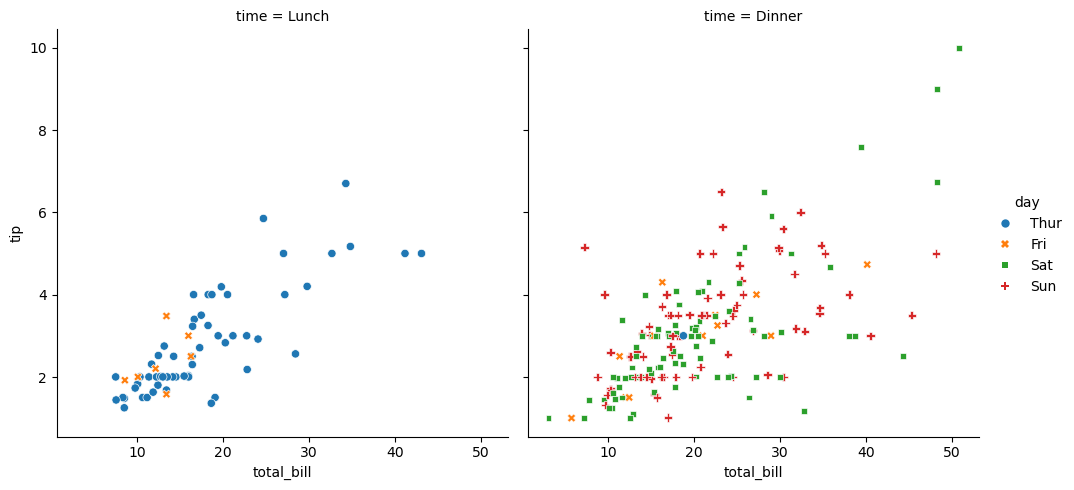

In [31]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)

## Histogram Plot
-  https://seaborn.pydata.org/generated/seaborn.histplot.htm

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

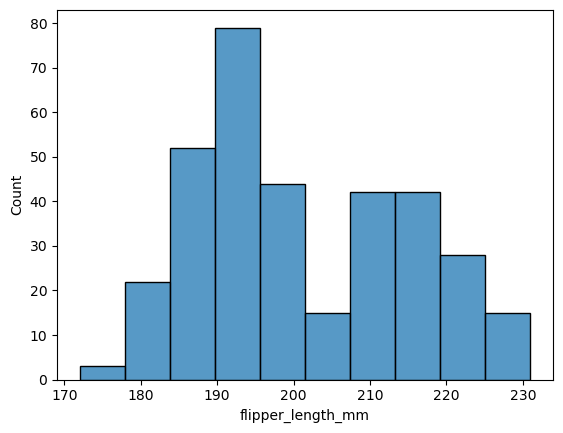

In [32]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

<Axes: xlabel='mpg', ylabel='Count'>

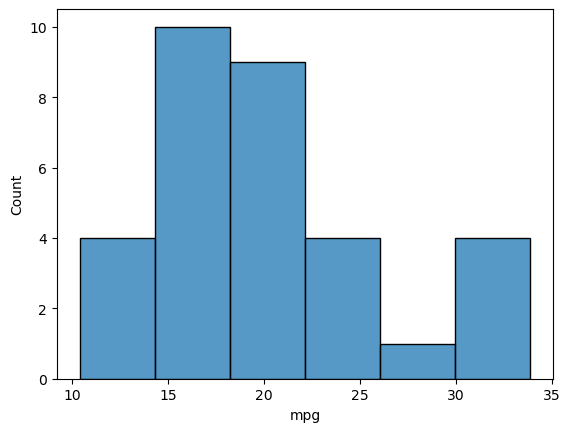

In [33]:
sns.histplot(data=mtcars, x="mpg")

<Axes: xlabel='Count', ylabel='mpg'>

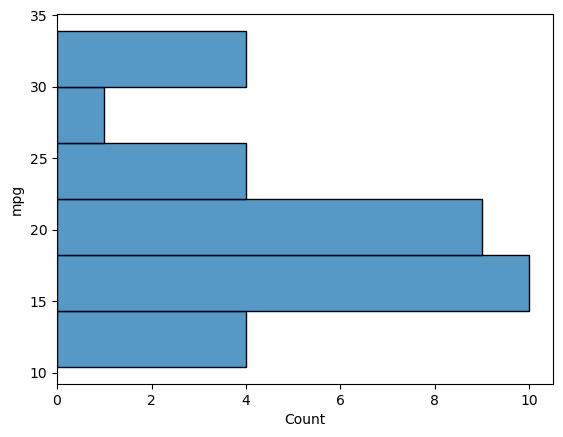

In [34]:
sns.histplot(data=mtcars, y="mpg")

<Axes: xlabel='mpg', ylabel='Count'>

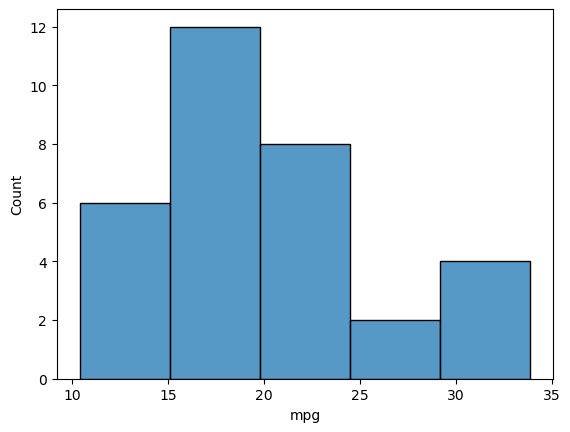

In [35]:
sns.histplot(data=mtcars, x="mpg", binwidth=5)

<Axes: xlabel='mpg', ylabel='Count'>

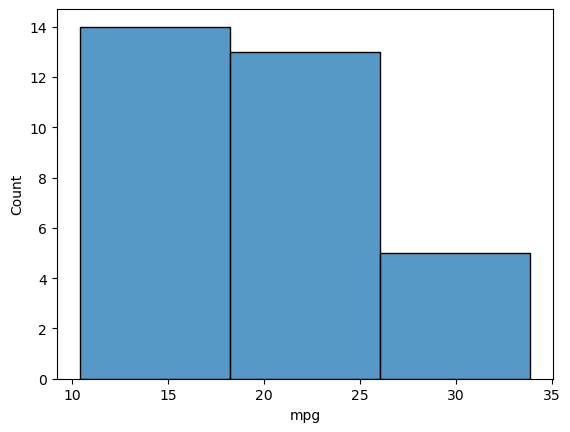

In [36]:
sns.histplot(data=mtcars, x="mpg", bins=3)

<Axes: xlabel='mpg', ylabel='Count'>

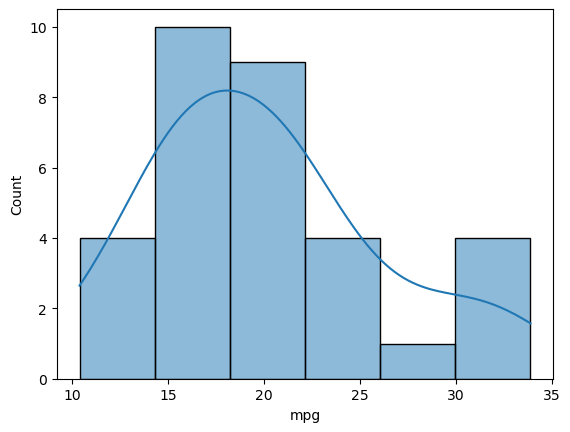

In [37]:
sns.histplot(data=mtcars, x="mpg", kde=True)

<Axes: ylabel='Count'>

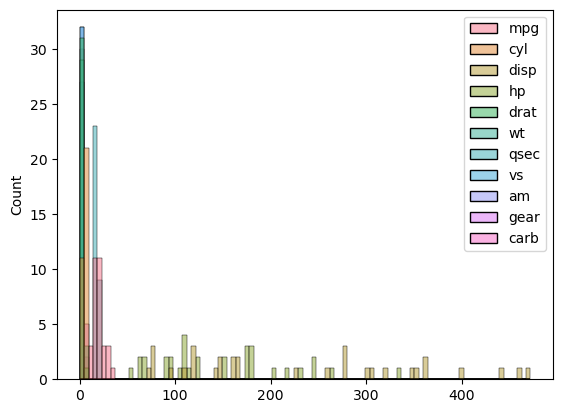

In [38]:
sns.histplot(data=mtcars)
#If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column:

<Axes: xlabel='wt', ylabel='Count'>

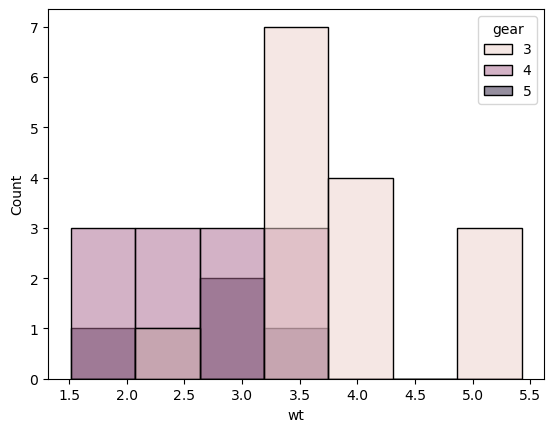

In [39]:
sns.histplot(data=mtcars, x="wt", hue="gear")

<Axes: xlabel='wt', ylabel='Count'>

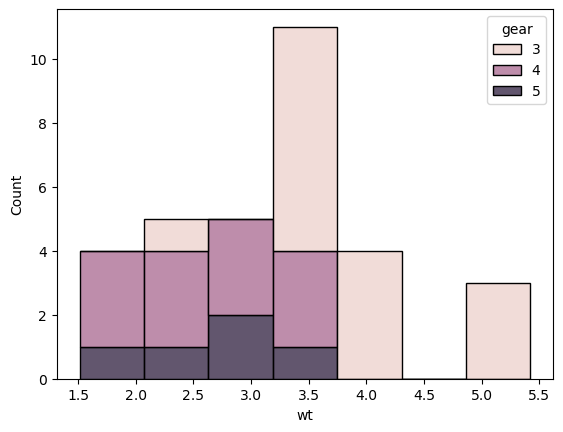

In [40]:
sns.histplot(data=mtcars, x="wt", hue="gear", multiple='stack')

<Axes: xlabel='wt', ylabel='Count'>

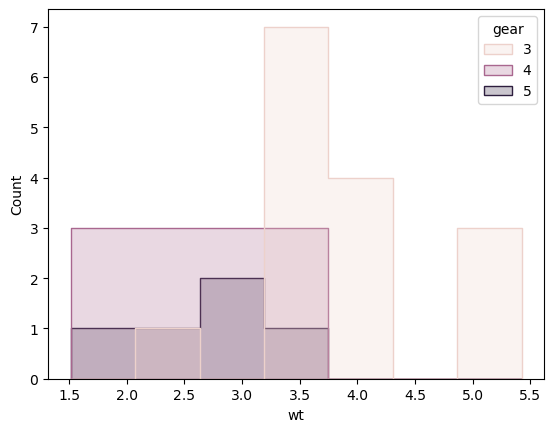

In [41]:
sns.histplot(data=mtcars, x="wt", hue="gear", element='step')

<Axes: xlabel='wt', ylabel='Count'>

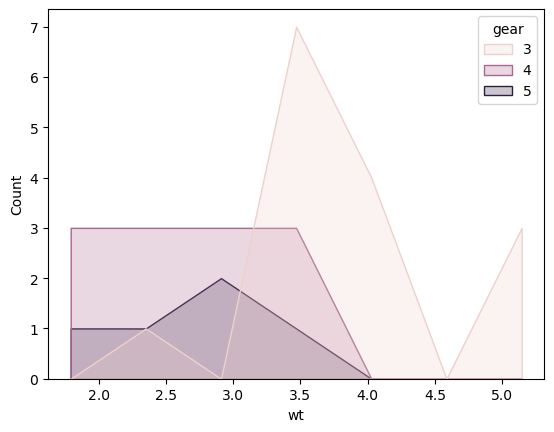

In [42]:
sns.histplot(data=mtcars, x="wt", hue="gear", element='poly')

<Axes: xlabel='bill_length_mm', ylabel='Density'>

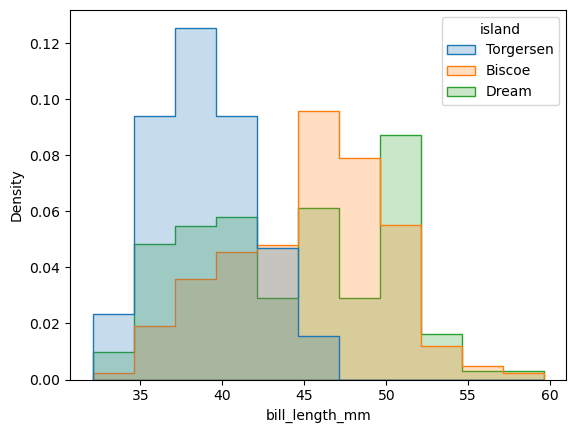

In [43]:
sns.histplot(     penguins, x="bill_length_mm", hue="island", element="step",    stat="density", common_norm=False, )

<Axes: xlabel='size', ylabel='Percent'>

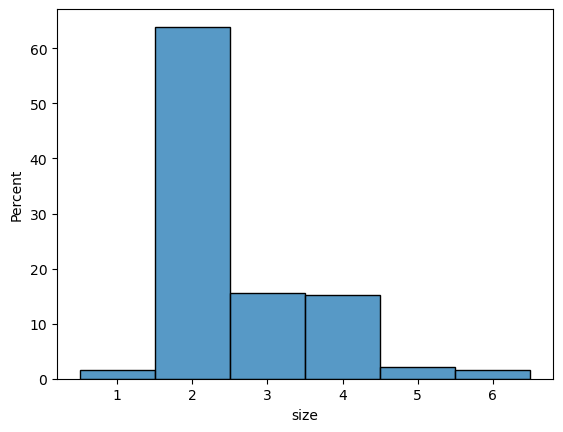

In [44]:
tips = sns.load_dataset("tips")
sns.histplot(data=tips, x="size", stat="percent", discrete=True)

<Axes: xlabel='day', ylabel='Count'>

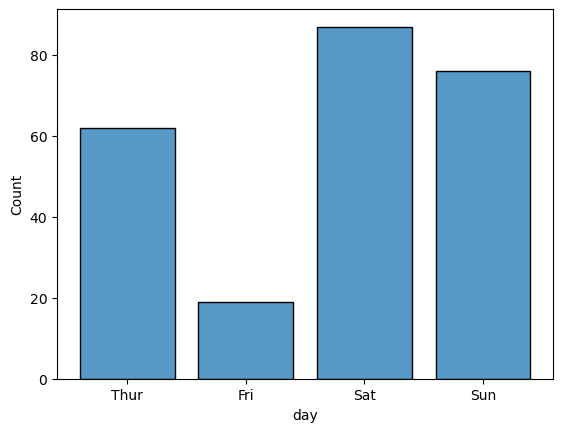

In [45]:
sns.histplot(data=tips, x="day", shrink=.8)

<Axes: xlabel='day', ylabel='Count'>

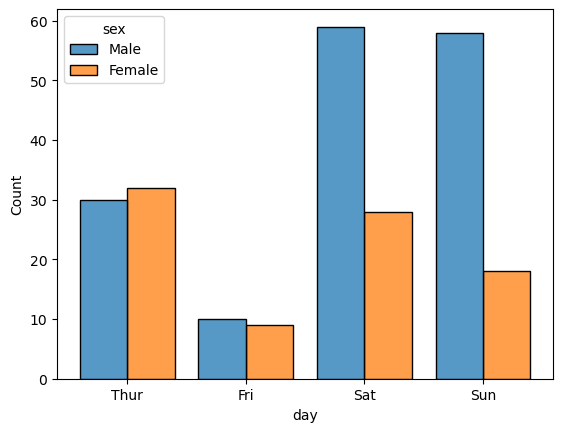

In [46]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

<Axes: xlabel='distance', ylabel='Count'>

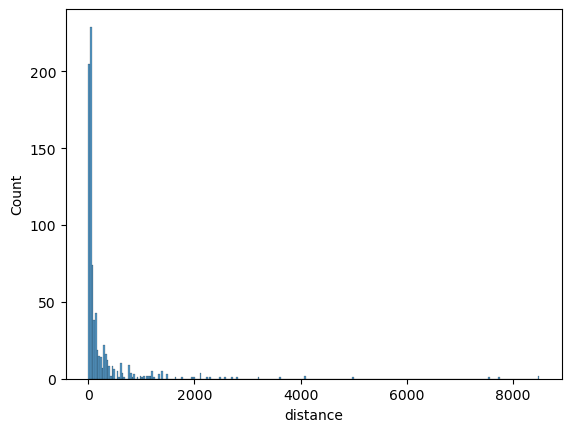

In [47]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")  #skewed

<Axes: xlabel='distance', ylabel='Count'>

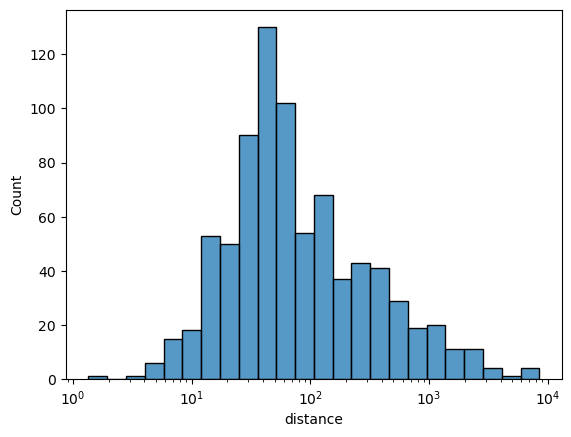

In [62]:
sns.histplot(data=planets, x="distance", log_scale=True)

<Axes: xlabel='distance', ylabel='Count'>

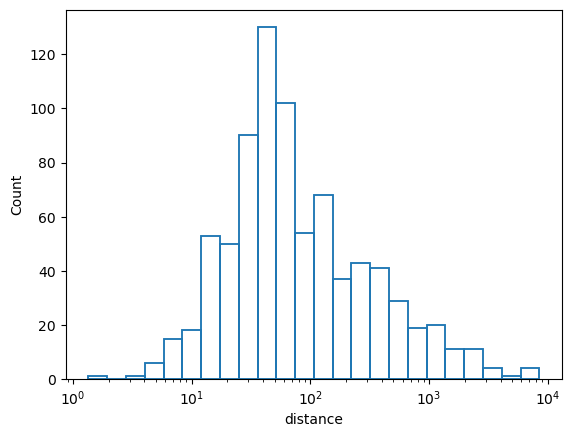

In [63]:
sns.histplot(data=planets, x="distance", log_scale=True, fill=False)

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

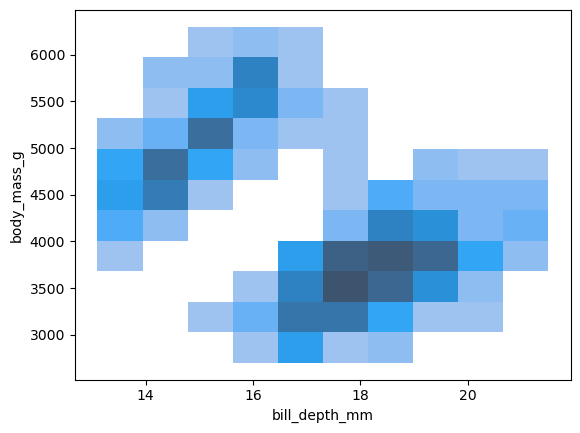

In [64]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

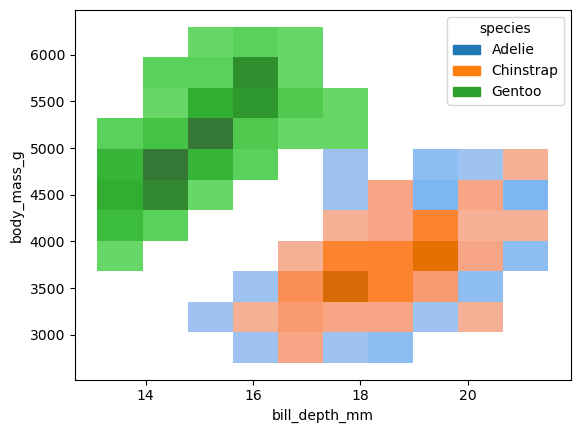

In [65]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species")

## Heat map
-  https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: xlabel='Task', ylabel='Model'>

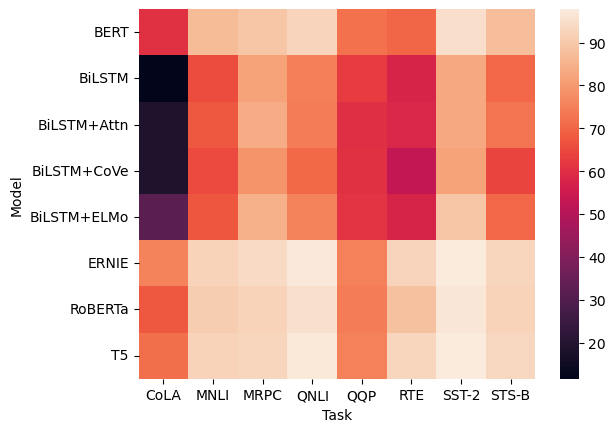

In [66]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

<Axes: xlabel='Task', ylabel='Model'>

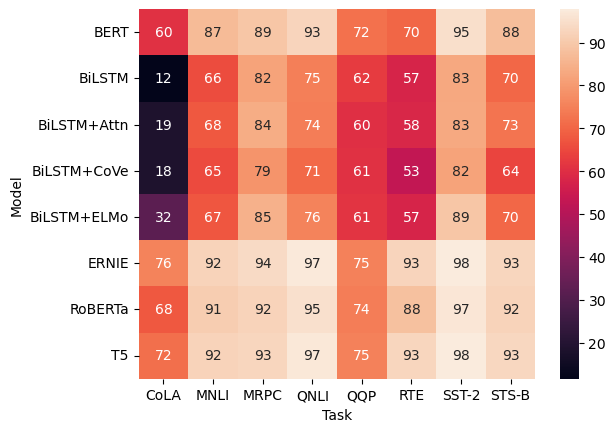

In [67]:
sns.heatmap(glue, annot=True)

<Axes: xlabel='Task', ylabel='Model'>

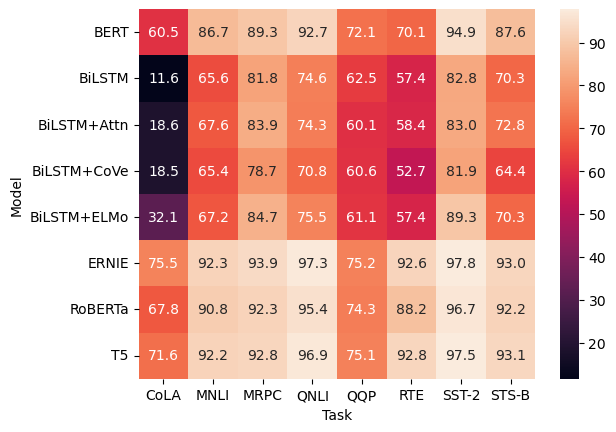

In [68]:
sns.heatmap(glue, annot=True, fmt=".1f")

<Axes: xlabel='Task', ylabel='Model'>

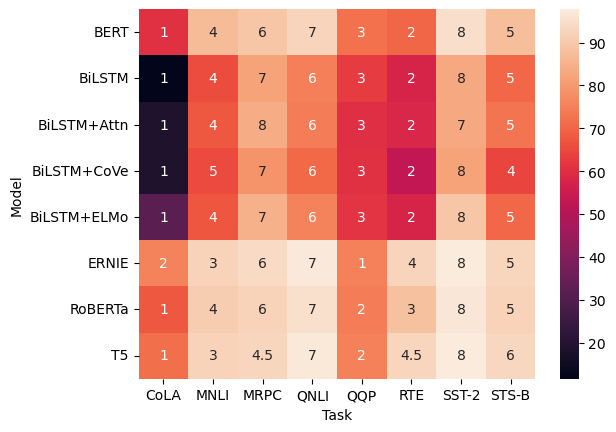

In [69]:
sns.heatmap(glue, annot=glue.rank(axis="columns"))

<Axes: xlabel='Task', ylabel='Model'>

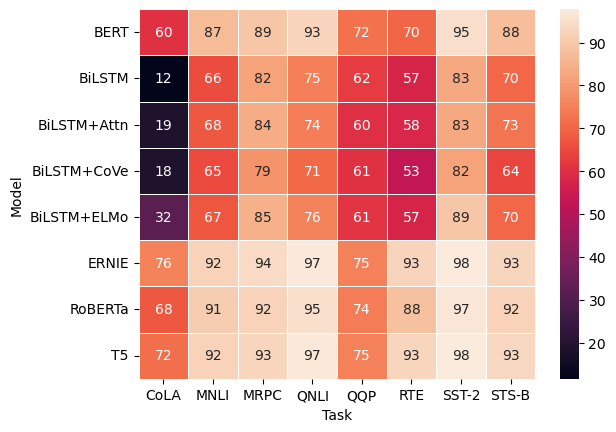

In [70]:
sns.heatmap(glue, annot=True, linewidth=.5)

<Axes: xlabel='Task', ylabel='Model'>

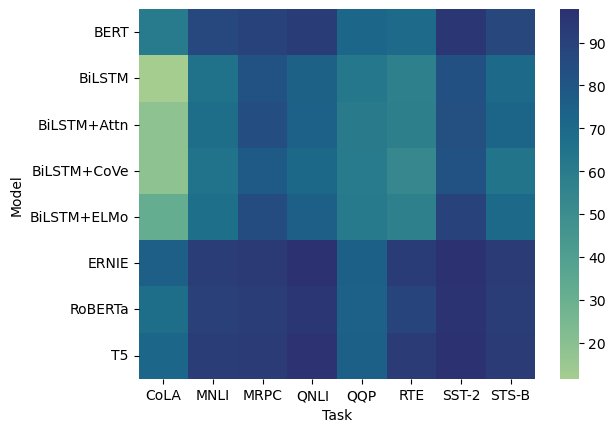

In [71]:
sns.heatmap(glue, cmap="crest")

<Axes: xlabel='Task', ylabel='Model'>

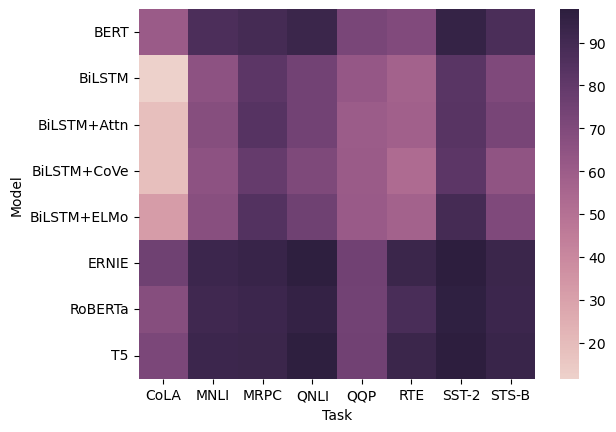

In [72]:
sns.heatmap(glue, cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: xlabel='Task', ylabel='Model'>

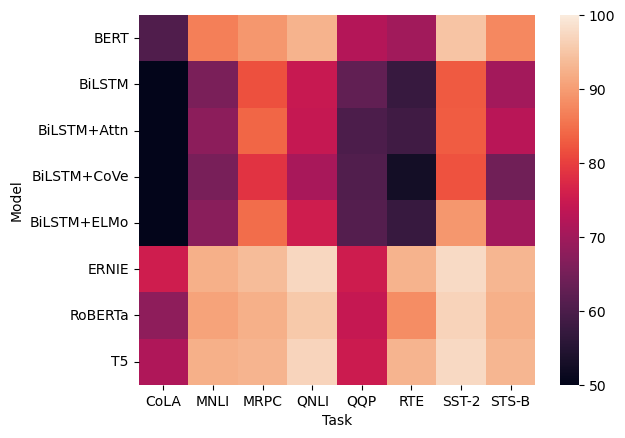

In [73]:
sns.heatmap(glue, vmin=50, vmax=100)

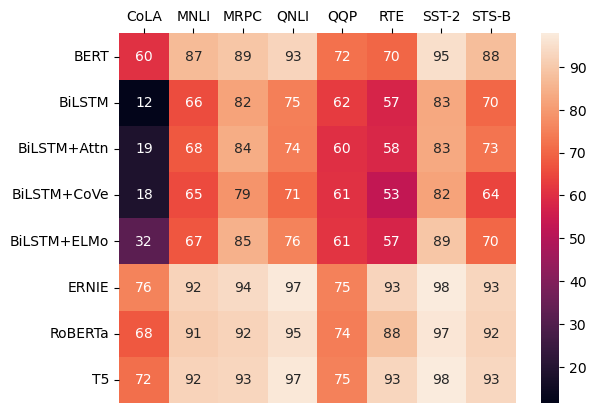

In [74]:
ax = sns.heatmap(glue, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

##  Box plot
-  https://seaborn.pydata.org/generated/seaborn.boxplot.html
-  seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)

In [75]:
titanic = sns.load_dataset('titanic')

<Axes: xlabel='age'>

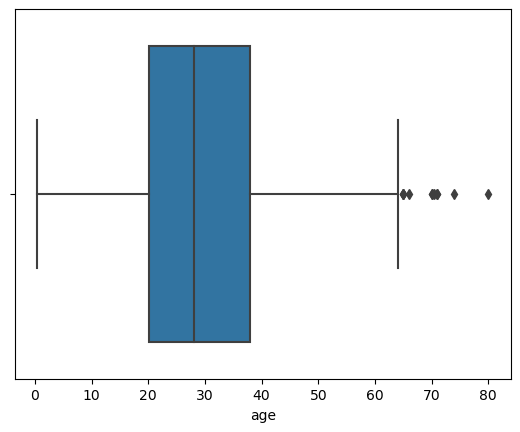

In [78]:
sns.boxplot(x=titanic["age"])

<Axes: xlabel='age', ylabel='class'>

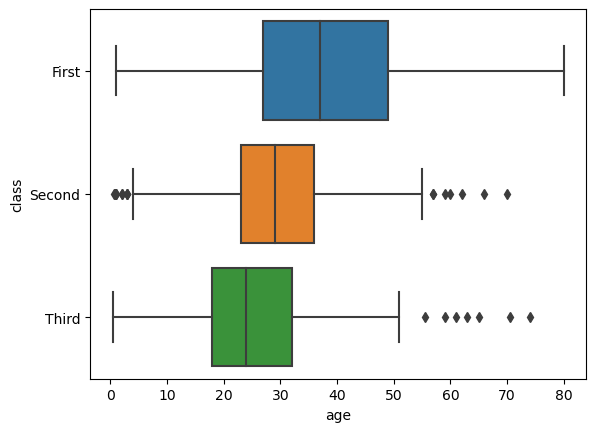

In [79]:
sns.boxplot(data=titanic, x="age", y="class")

<Axes: xlabel='class', ylabel='age'>

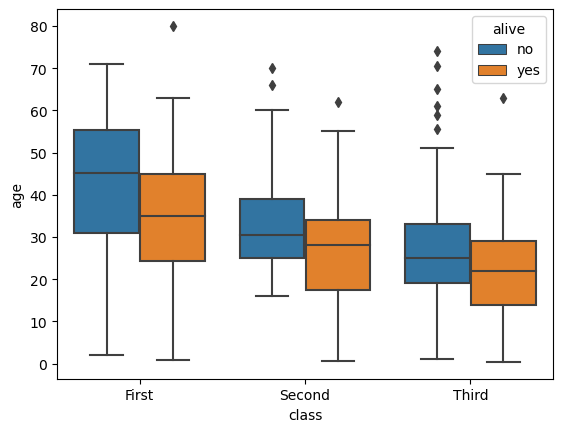

In [80]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive")

<Axes: xlabel='class', ylabel='age'>

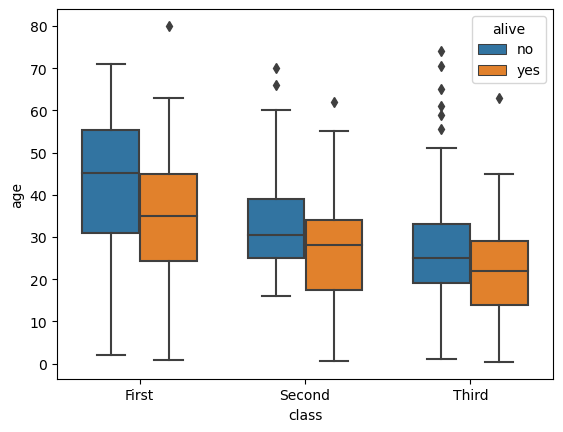

In [84]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive", width=.7)

<Axes: xlabel='age', ylabel='deck'>

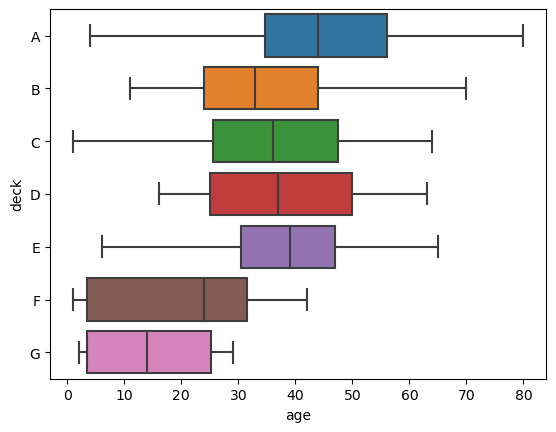

In [85]:
sns.boxplot(data=titanic, x="age", y="deck", whis=(0, 100))

<Axes: xlabel='age', ylabel='deck'>

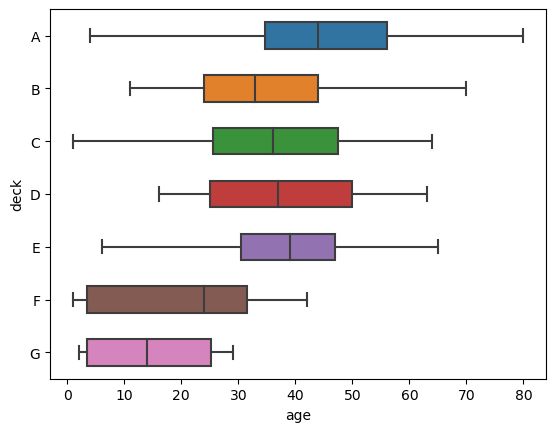

In [86]:
sns.boxplot(data=titanic, x="age", y="deck", width=.5)

In [88]:
#sns.boxplot(data=titanic, x="age", y="deck", color=".8", linecolor="#137", linewidth=.75)

In [90]:
#ax = sns.boxplot(x=titanic["age"].round(-1), y=titanic["fare"], native_scale=True)
#ax.axvline(25, color=".3", dashes=(2, 2))

<Axes: xlabel='age', ylabel='class'>

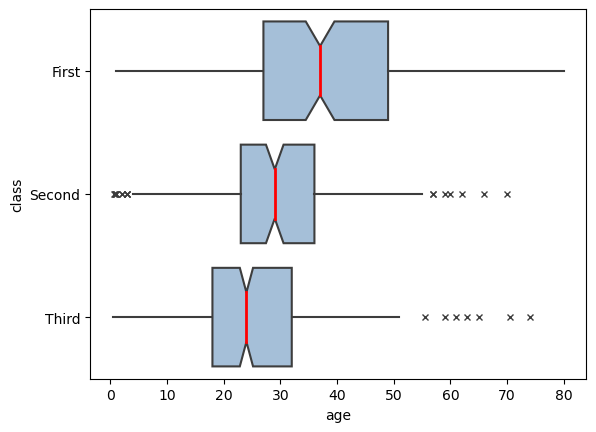

In [91]:
sns.boxplot(
    data=titanic, x="age", y="class",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

## Violin Plot
-  https://seaborn.pydata.org/generated/seaborn.violinplot.html

## Joint Plot
-  

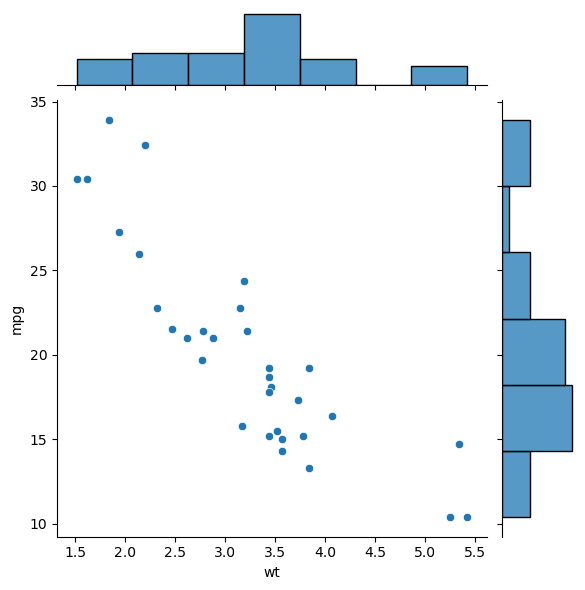

In [9]:
sns.jointplot(data=mtcars, x="wt", y="mpg")